In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import networkit as nk

from graph_generator import GraphGenerator, HierarchicalGraph

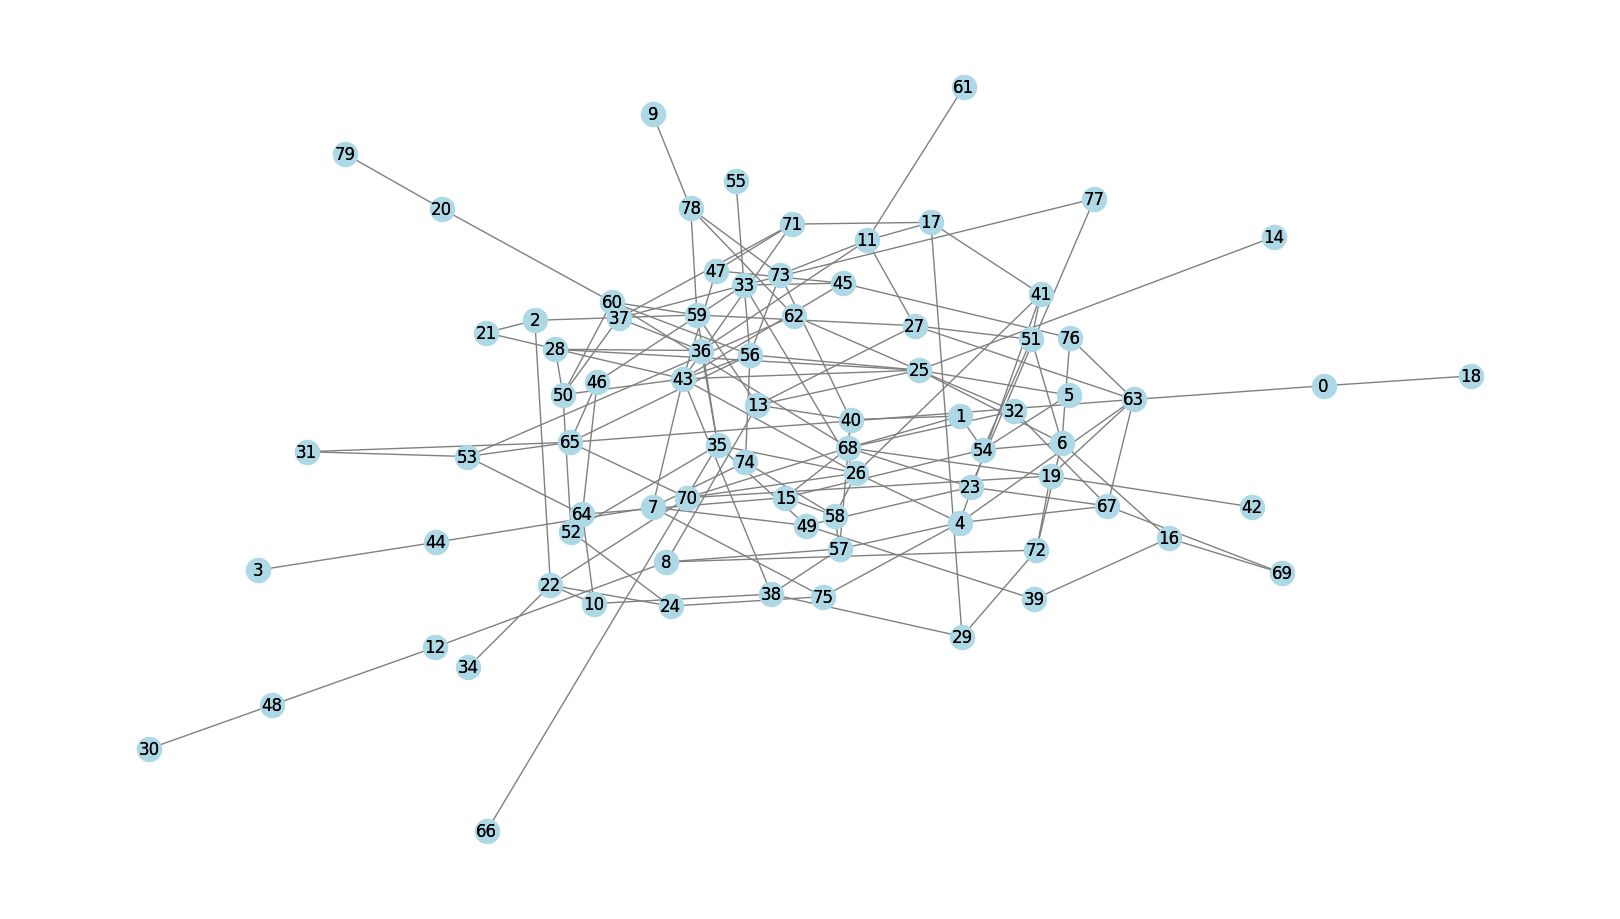

In [39]:
# Генерация графа с случайными весами
graph_generator = GraphGenerator()

# Генерация случайного графа G(n, m) с 20 узлами и 40 ребрами, с добавлением случайных весов
graph_generator.generate_graph("gnm_random", n=80, m=150, weighted=True)
gnm_random_graph = graph_generator.get_graph()

# graph_generator.generate_graph("balanced_tree", r=10, h=2)
# balanced_tree_graph = graph_generator.get_graph()

# Преобразование графа в формат Networkit
hg = HierarchicalGraph(gnm_random_graph)

# Рисование начального графа
hg.draw_graph(edge_labels=False, figsize=(16, 9))

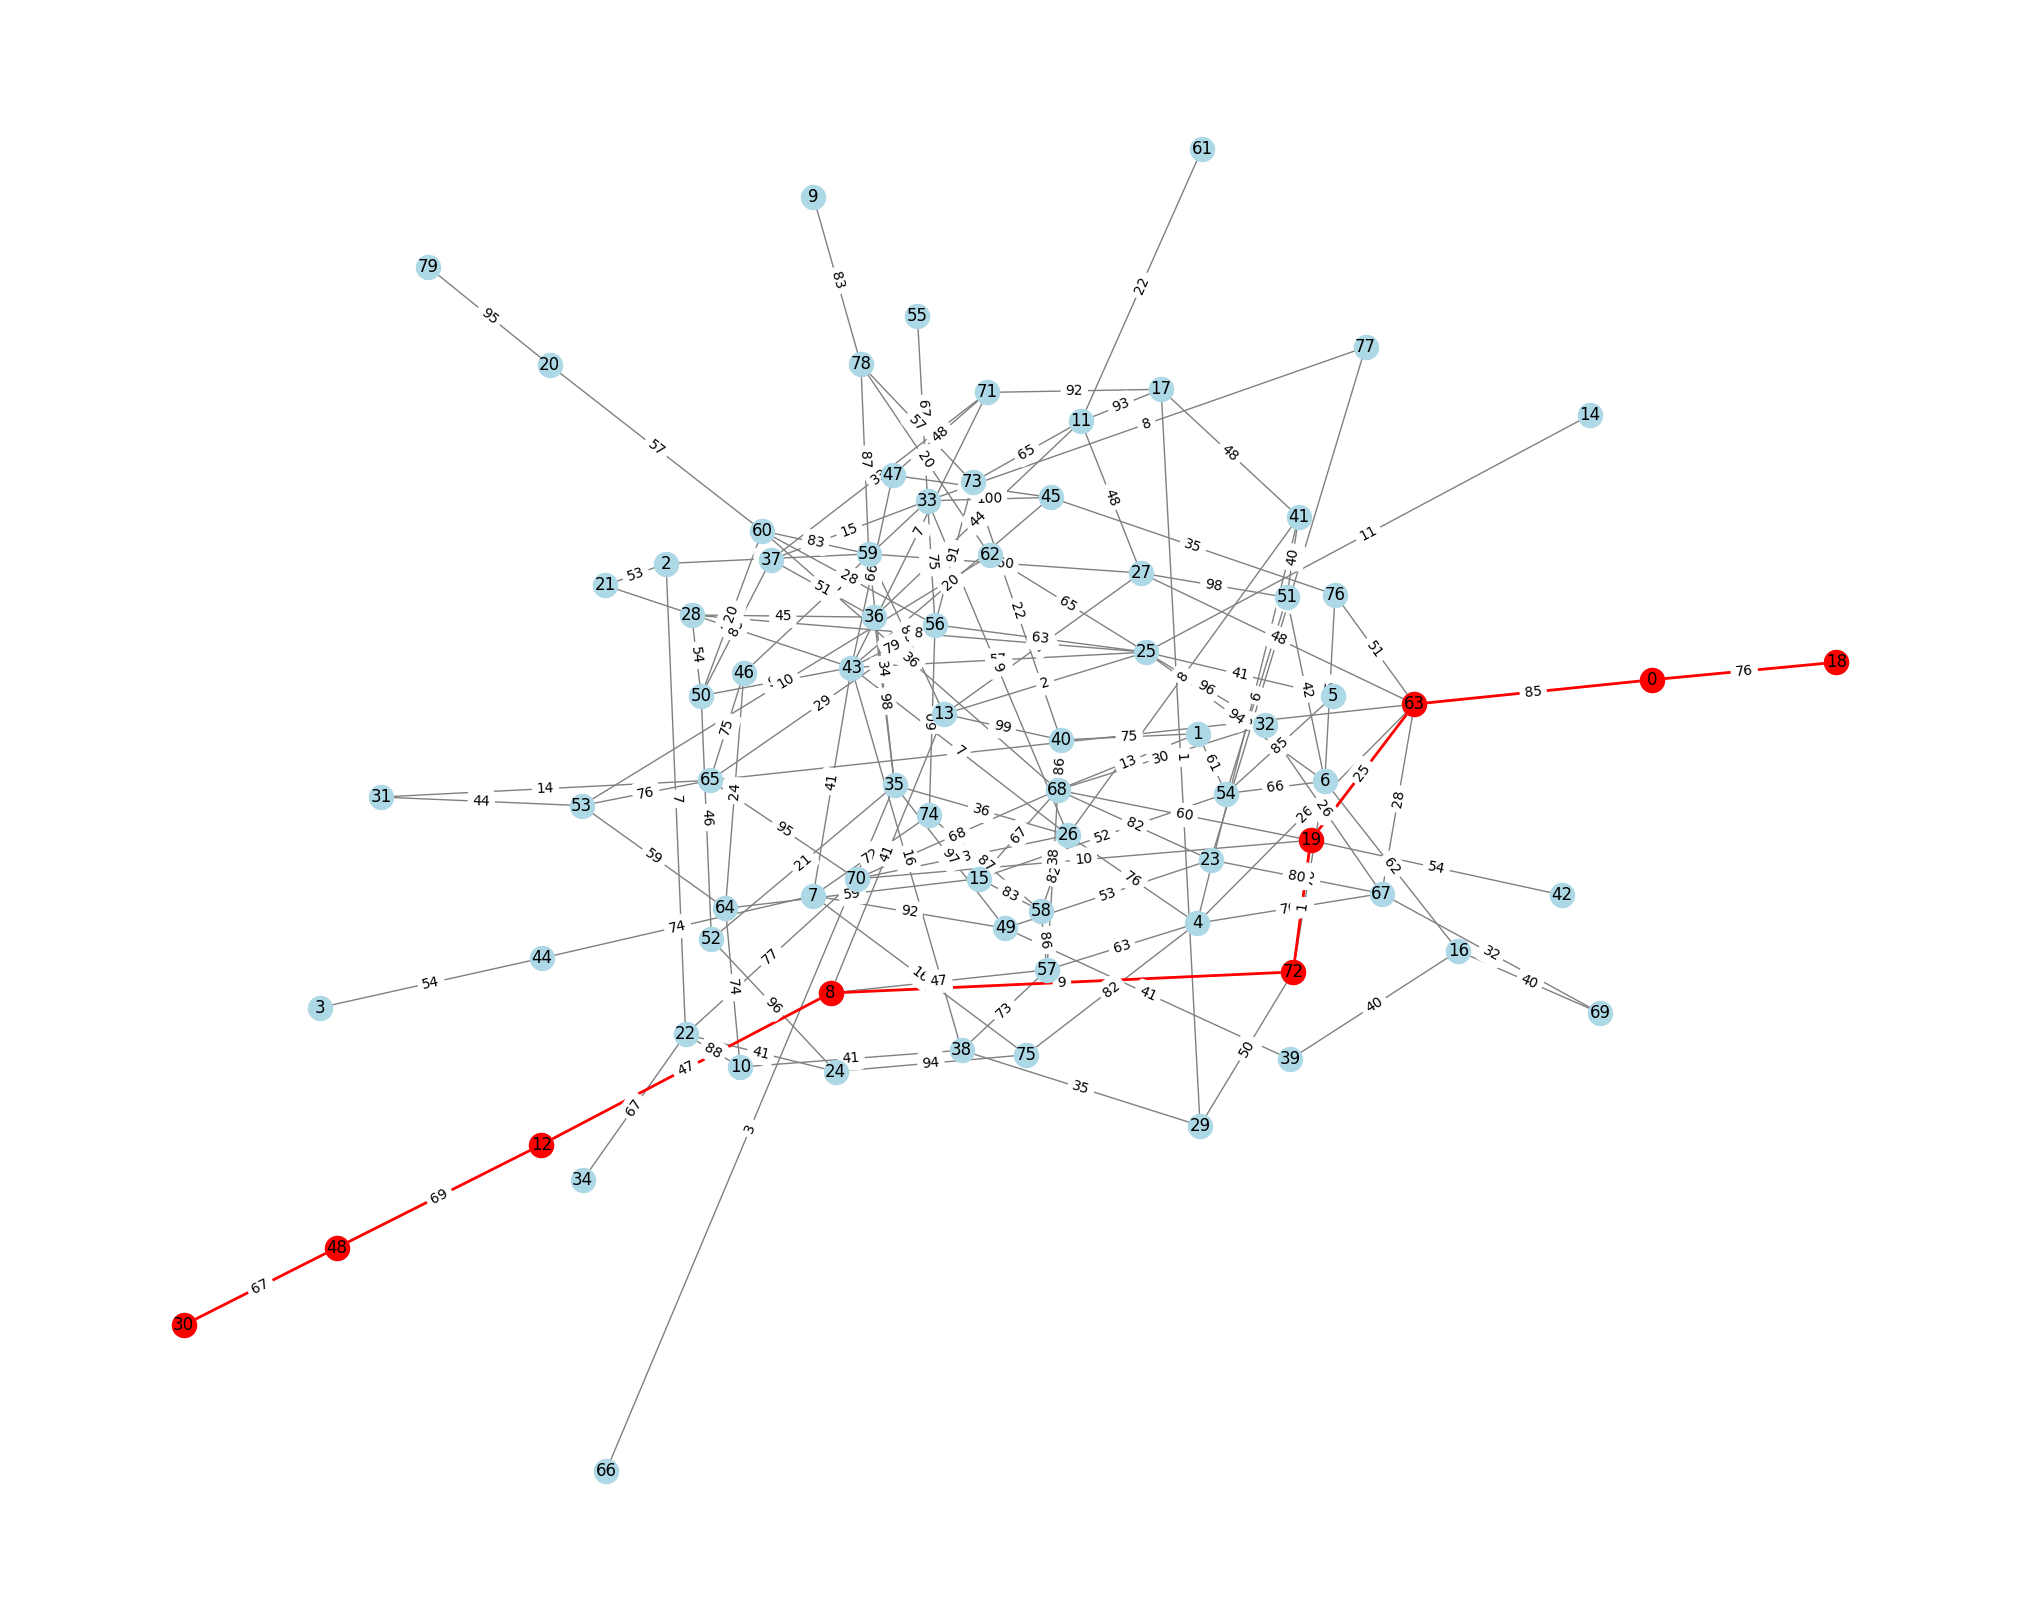

In [42]:
# Поиск маршрута между двумя узлами
node1 = 30
node2 = 18
hg.draw_route(node1, node2, True, (20, 16))

e:\Roman\GitHub\Graphs-Hierarchies\.venv\lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


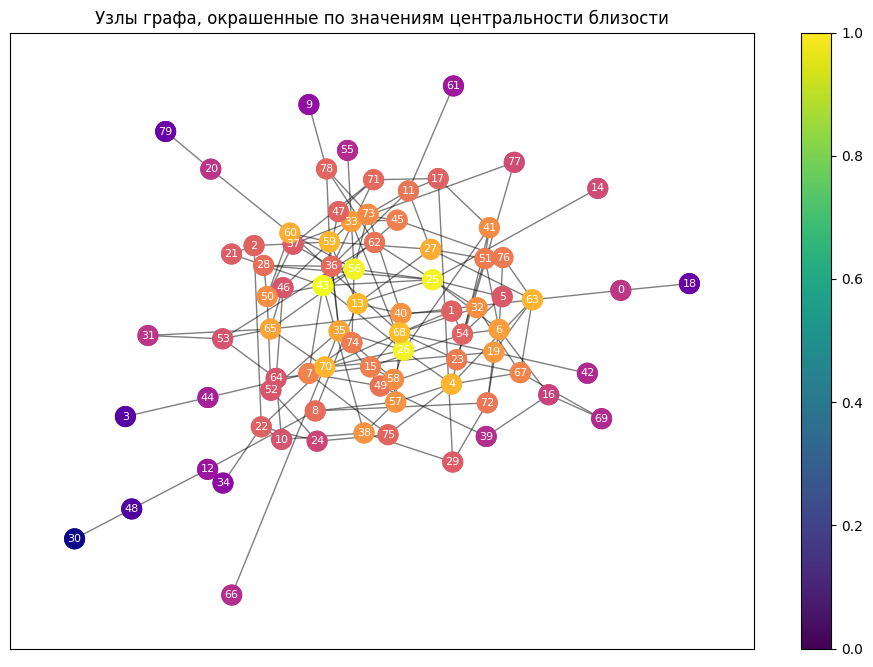

In [43]:
import numpy as np

closeness_centrality = nx.closeness_centrality(hg.graph)
# Получение значений центральности в виде списка
values = np.array(list(closeness_centrality.values()))

# Нормализация значений центральности для отображения в цвете
norm = plt.Normalize(vmin=values.min(), vmax=values.max())
node_colors = plt.cm.plasma(norm(values))

# Построение графа
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(hg.graph, seed=42)  # Определение расположения узлов

# Отображение узлов с цветовой шкалой на основе центральности
nx.draw_networkx_nodes(hg.graph, pos, node_size=200, node_color=node_colors, cmap=plt.cm.plasma)
nx.draw_networkx_edges(hg.graph, pos, alpha=0.5)
nx.draw_networkx_labels(hg.graph, pos, font_size=8, font_color='white')

# Добавление цветовой шкалы
nodes = nx.draw_networkx_nodes(hg.graph, pos, node_size=200, node_color=node_colors, cmap=plt.cm.plasma)

sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm)
sm.set_array(values)
plt.colorbar(nodes, ax=plt.gca(), orientation='vertical')

plt.title("Узлы графа, окрашенные по значениям центральности близости")
plt.show()

C:\Users\local\AppData\Local\Temp\ipykernel_15560\3561635230.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', num_communities)


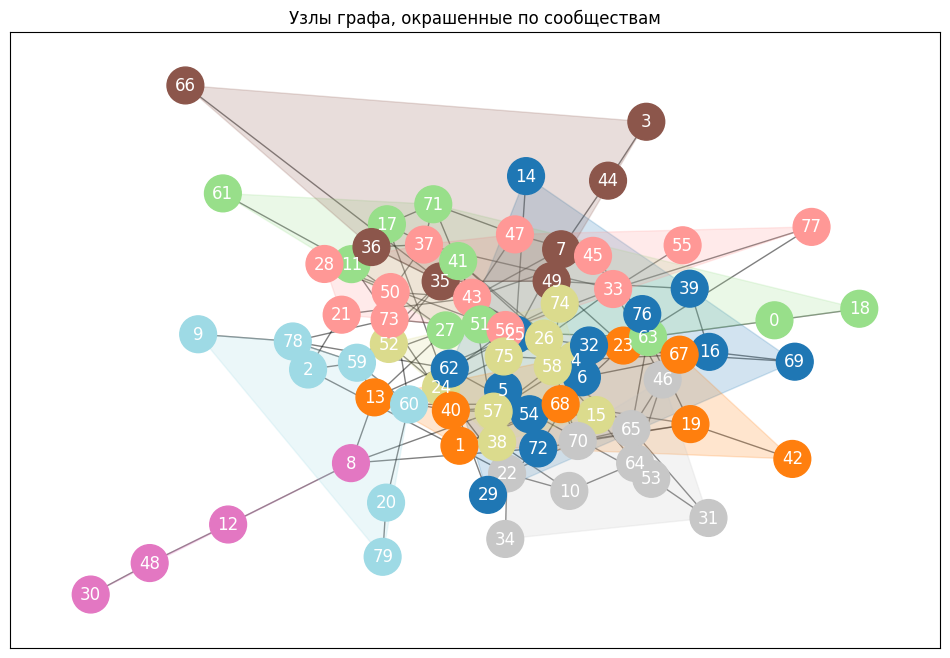

In [51]:
def plot_community_graph(G, seed=123):
    # Получение сообществ с помощью алгоритма Louvain
    communities = nx.community.louvain_communities(G, seed=seed)
    
    # Создание цветовой карты для сообществ
    num_communities = len(communities)
    colors = plt.cm.get_cmap('tab20', num_communities)
    
    # Поиск узлов с наибольшей центральностью в каждом сообществе
    central_nodes = []
    for community in communities:
        subgraph = G.subgraph(community)
        centrality = nx.closeness_centrality(subgraph)
        central_node = max(centrality, key=centrality.get)
        central_nodes.append(central_node)
    
    # Создание иерархического графа
    hierarchical_graph = nx.Graph()
    hierarchical_graph.add_nodes_from(central_nodes)
    
    # Связывание кластеров на основе существующих ребер
    for i in range(len(central_nodes)):
        for j in range(i + 1, len(central_nodes)):
            community_i = communities[i]
            community_j = communities[j]
            edges_between = [(u, v) for u in community_i for v in community_j if G.has_edge(u, v)]
            if edges_between:
                central_node_i = central_nodes[i]
                central_node_j = central_nodes[j]
                hierarchical_graph.add_edge(central_node_i, central_node_j, weight=1.0)
    
    # Создание словаря, который связывает узлы с цветами их сообществ
    node_colors = {node: colors(i) for i, community in enumerate(communities) for node in community}
    
    # Извлечение цветов центральных узлов в нужном порядке
    central_node_color_list = [node_colors[node] for node in central_nodes]
    
    # Построение иерархического графа
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(hierarchical_graph, seed=seed)  # Определение расположения узлов

    # Отображение центральных узлов с цветовой шкалой на основе сообществ
    nx.draw_networkx_nodes(hierarchical_graph, pos, node_size=200, node_color=central_node_color_list, cmap=colors)
    nx.draw_networkx_edges(hierarchical_graph, pos, edge_color='red', alpha=0.8, width=2)
    nx.draw_networkx_labels(hierarchical_graph, pos, font_size=8, font_color='white')

    plt.title("Иерархический граф центральных узлов")
    plt.show()

from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

def plot_community_graph(G, seed=123):
    # Получение сообществ с помощью алгоритма Louvain
    communities = nx.community.louvain_communities(G, seed=seed)
    
    # Создание цветовой карты для сообществ
    num_communities = len(communities)
    colors = plt.cm.get_cmap('tab20', num_communities)
    
    # Создание словаря, который связывает узлы с цветами их сообществ
    node_colors = {}
    for i, community in enumerate(communities):
        for node in community:
            node_colors[node] = colors(i)
    
    # Извлечение цветов узлов в нужном порядке
    node_color_list = [node_colors[node] for node in G.nodes()]
    
    # Построение графа
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=seed)  # Определение расположения узлов
    
    # Отображение узлов с цветовой шкалой на основе сообществ
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_color_list, cmap=colors)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='white')
    
    # Рисование контуров вокруг сообществ
    ax = plt.gca()
    for community in communities:
        community_list = list(community)  # Преобразование множества в список
        community_pos = [pos[node] for node in community_list]
        if len(community_pos) >= 3:  # Выпуклая оболочка определяется минимум для трех точек
            hull = ConvexHull(community_pos)
            polygon = Polygon([community_pos[vertex] for vertex in hull.vertices], fill=True, color=node_colors[community_list[0]], alpha=0.2)
            ax.add_patch(polygon)

    plt.title("Узлы графа, окрашенные по сообществам")
    plt.show()



plot_community_graph(hg.graph, seed=123)